In [24]:
import json
import re
import numpy as np
import tqdm
import time
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pprint import pprint
import nltk; nltk.download('stopwords')
import json
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
# spacy for lemmatization
import spacy
# Enable logging for gensim - optional
#import logging
#logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('german')
# Remove rare and common tokens.
from gensim.corpora import Dictionary

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alexandrarottenkolber/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
import random 

In [26]:
ls = ["apfel", "banane", "birne", "pflaume", "buch"]

In [27]:
ls

['apfel', 'banane', 'birne', 'pflaume', 'buch']

In [28]:
#with open('../../data/written/data_ready.txt', 'r') as infile:
with open('../../data/written/data_ready_concat_POSTag_all_sorted.txt', 'r') as infile:
    data_ready = json.load(infile)
infile.close()

In [29]:
# I added this now
random.shuffle(data_ready)

In [30]:
# Create a dictionary representation of the documents.
dictionary = Dictionary(data_ready)

# Filter out words that occur in less than 20 documents, or more than 50% of the documents.
#dictionary.filter_extremes(no_below=20, no_above=0.5)
dictionary.filter_extremes(no_below=20, no_above=0.4)

# Bag-of-words representation of the documents.
corpus = [dictionary.doc2bow(doc) for doc in data_ready]

from gensim.models import LdaMulticore
# helper function: get coherence values

In [31]:
print('Number of tokens: %d' % sum(dictionary.keys()))
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of tokens: 822901596
Number of unique tokens: 40569
Number of documents: 121387


In [32]:
dictionary.doc2bow(data_ready[1])

[(27, 1),
 (36, 1),
 (38, 1),
 (40, 4),
 (51, 1),
 (56, 1),
 (59, 1),
 (86, 1),
 (87, 1),
 (88, 1),
 (89, 2),
 (90, 3),
 (91, 1),
 (92, 1),
 (93, 1),
 (94, 3),
 (95, 3),
 (96, 1),
 (97, 1),
 (98, 1),
 (99, 3),
 (100, 2),
 (101, 3),
 (102, 3),
 (103, 1),
 (104, 1),
 (105, 1),
 (106, 1),
 (107, 1),
 (108, 1),
 (109, 1),
 (110, 1),
 (111, 1),
 (112, 3),
 (113, 1),
 (114, 5),
 (115, 1),
 (116, 1),
 (117, 4),
 (118, 2),
 (119, 1),
 (120, 1),
 (121, 1),
 (122, 1),
 (123, 1),
 (124, 1),
 (125, 1),
 (126, 1),
 (127, 1),
 (128, 1),
 (129, 1),
 (130, 1),
 (131, 1),
 (132, 1),
 (133, 1),
 (134, 1),
 (135, 2),
 (136, 1),
 (137, 1),
 (138, 1),
 (139, 1),
 (140, 1),
 (141, 2),
 (142, 1),
 (143, 1),
 (144, 1),
 (145, 1),
 (146, 1),
 (147, 1),
 (148, 3),
 (149, 1),
 (150, 1),
 (151, 2),
 (152, 1),
 (153, 2),
 (154, 2),
 (155, 1),
 (156, 1),
 (157, 1),
 (158, 1),
 (159, 1),
 (160, 1),
 (161, 1),
 (162, 1),
 (163, 1),
 (164, 1),
 (165, 1),
 (166, 2),
 (167, 1),
 (168, 1),
 (169, 1),
 (170, 1),
 (171, 1)

In [33]:
corpus[1]

[(27, 1),
 (36, 1),
 (38, 1),
 (40, 4),
 (51, 1),
 (56, 1),
 (59, 1),
 (86, 1),
 (87, 1),
 (88, 1),
 (89, 2),
 (90, 3),
 (91, 1),
 (92, 1),
 (93, 1),
 (94, 3),
 (95, 3),
 (96, 1),
 (97, 1),
 (98, 1),
 (99, 3),
 (100, 2),
 (101, 3),
 (102, 3),
 (103, 1),
 (104, 1),
 (105, 1),
 (106, 1),
 (107, 1),
 (108, 1),
 (109, 1),
 (110, 1),
 (111, 1),
 (112, 3),
 (113, 1),
 (114, 5),
 (115, 1),
 (116, 1),
 (117, 4),
 (118, 2),
 (119, 1),
 (120, 1),
 (121, 1),
 (122, 1),
 (123, 1),
 (124, 1),
 (125, 1),
 (126, 1),
 (127, 1),
 (128, 1),
 (129, 1),
 (130, 1),
 (131, 1),
 (132, 1),
 (133, 1),
 (134, 1),
 (135, 2),
 (136, 1),
 (137, 1),
 (138, 1),
 (139, 1),
 (140, 1),
 (141, 2),
 (142, 1),
 (143, 1),
 (144, 1),
 (145, 1),
 (146, 1),
 (147, 1),
 (148, 3),
 (149, 1),
 (150, 1),
 (151, 2),
 (152, 1),
 (153, 2),
 (154, 2),
 (155, 1),
 (156, 1),
 (157, 1),
 (158, 1),
 (159, 1),
 (160, 1),
 (161, 1),
 (162, 1),
 (163, 1),
 (164, 1),
 (165, 1),
 (166, 2),
 (167, 1),
 (168, 1),
 (169, 1),
 (170, 1),
 (171, 1)

In [34]:
def get_coherence_value(corpus, dictionary,
                        k, a, e, chunksize = 5000,
                        passes = 20, iterations = 400,
                        eval_every = None):

    lda_model_mc = LdaMulticore(
        corpus=corpus,
        id2word=dictionary,
        chunksize=chunksize,
        alpha=a,
        eta=e,
        iterations=iterations,
        num_topics=k,
        passes=passes,
        eval_every=eval_every
    )

    coherence_m_lda = CoherenceModel(model=lda_model_mc,
                                         texts=data_ready,
                                         dictionary=dictionary,
                                         coherence='c_v')

    return coherence_m_lda.get_coherence()

### First model

In [35]:
# Train LDA model.
from gensim.models import LdaModel

In [36]:
# Train LDA model.
from gensim.models import LdaModel

# Set training parameters.
num_topics = 100
chunksize = 4000
passes = 20
iterations = 400
eval_every = None  # Don't evaluate model perplexity, takes too much time.

# Make a index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

start_time = time.time()

lda_model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every
)

print(f'Time taken : {(time.time() - start_time) / 60:.2f} mins')

NotImplementedError: auto-tuning alpha not implemented in multicore LDA; use plain LdaModel.

In [ ]:
# Save model to disk.
lda_model.save("lda_model_140322")

In [ ]:
coherence_m_lda = CoherenceModel(model=lda_model,
                                 texts=data_ready,
                                 dictionary=dictionary, 
                                 coherence='c_v')

coherence_m_lda.get_coherence()

### See results grid search 

In [39]:
#model_results
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

lda_tuning1 = []

with open('../../code/Plenarprotokolle/Grid_search/lda_grid_search_results_50per_corpus_concat.csv', 'r') as infile:
    file_reader = csv.reader(infile, delimiter=',')
    for row in file_reader:
        lda_tuning1.append(row)
infile.close()

In [40]:
lda_tuning_df = pd.DataFrame(lda_tuning1).rename(columns = {0: "Validation_Set", 1 : "Topics", 2: "Alpha", 3: "Eta", 4: "Coherence"})
lda_tuning_df = lda_tuning_df.drop(lda_tuning_df.index[[0]])
#lda_tuning_df.plot(x = "Topics", y = "Coherence")
#top_coh = lda_tuning_df[["Topics", "Coherence"]].applymap(lambda x: float(x))#[1]
lda_tuning_df = pd.concat([lda_tuning_df.drop(columns = ["Topics", "Coherence"]), lda_tuning_df[["Topics", "Coherence"]].applymap(lambda x: float(x))], axis=1)

In [41]:
lda_tuning_df

,Validation_Set,Alpha,Eta,Topics,Coherence
1,60700 Corpus,0.01,0.01,10.0,0.429167
2,60700 Corpus,0.01,0.31,10.0,0.403507
3,60700 Corpus,0.01,0.61,10.0,0.462761
4,60700 Corpus,0.01,0.9099999999999999,10.0,0.393262
5,60700 Corpus,0.01,symmetric,10.0,0.394956
...,...,...,...,...,...
146,60700 Corpus,asymmetric,0.01,200.0,0.410294
147,60700 Corpus,asymmetric,0.31,200.0,0.407536
148,60700 Corpus,asymmetric,0.61,200.0,0.344691
149,60700 Corpus,asymmetric,0.9099999999999999,200.0,0.352407


In [42]:
lda_tuning_df["Topics"].unique()

array([ 10.,  50., 100., 150., 200.])

In [43]:
corp_5 = lda_tuning_df[lda_tuning_df["Validation_Set"] == "60700 Corpus"][["Alpha", "Eta", "Topics", "Coherence"]]
corp_5 = corp_5[corp_5["Topics"] < 500].copy()
#corp_100 = lda_tuning_df[lda_tuning_df["Validation_Set"] == "100% Corpus"][["Alpha", "Eta", "Topics", "Coherence"]]
#corp_100

corp_5["Eta"] = np.where((corp_5["Eta"] == "0.9099999999999999"), "0.91", corp_5["Eta"])
corp_5["Alpha"] = np.where((corp_5["Alpha"] == "0.9099999999999999"), "0.91", corp_5["Alpha"])
#df

#corp_5[corp_5["Eta"] == "0.9099999999999999"]["Eta"] = "0.91"
corp_5

,Alpha,Eta,Topics,Coherence
1,0.01,0.01,10.0,0.429167
2,0.01,0.31,10.0,0.403507
3,0.01,0.61,10.0,0.462761
4,0.01,0.91,10.0,0.393262
5,0.01,symmetric,10.0,0.394956
...,...,...,...,...
146,asymmetric,0.01,200.0,0.410294
147,asymmetric,0.31,200.0,0.407536
148,asymmetric,0.61,200.0,0.344691
149,asymmetric,0.91,200.0,0.352407


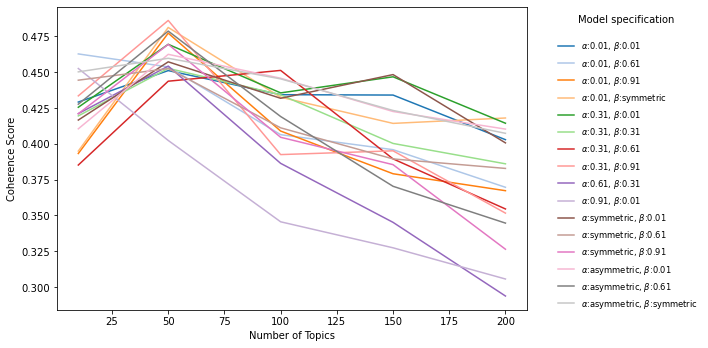

In [44]:
labels = []
#colors = ['#56B4E9',   '#E69F00', '#F0E442']
# Set your custom color palette
#sns.set_palette(sns.color_palette(colors))
sns.set_palette(sns.color_palette("tab20"))

plt.figure(figsize=(10,5))

counter = 0
for a in list(corp_5["Alpha"].unique()): 
    #print(a)
    for e in list(corp_5["Eta"].unique()): 
        #label = "alpha:" + a + ", beta:" + e 
        
        label = "$\\alpha$:" + a + ", $\\beta$:" + e 
        
        #print(e)
        #corp_100[(corp_100["Alpha"] == a) & (corp_100["Eta"] == e)].plot(x = "Topics", y = "Coherence", kind = "scatter")
        
        
        data = corp_5[(corp_5["Alpha"] == a) & (corp_5["Eta"] == e)]
        #data["color"] = cmap(counter)
        #counter += 1
        #print(type(data))

        if (data["Coherence"] > 0.45).any():
            labels.append(label)
            #plt.figure(figsize = (10, 5))  
            plt.plot("Topics", "Coherence", data = data)
            
            #data[["Topics", "Coherence"]].plot( x = "Topics", y = "Coherence", colormap = "tab20")

        
#plt.xlim(25, 100)
plt.ylabel('Coherence Score')
plt.xlabel('Number of Topics')
#plt.title('Grid Search')
#plt.legend()
plt.legend(title = "Model specification \n", labels = labels, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small', frameon=False)
#plt.show()
plt.tight_layout()
plt.savefig("Results_grid_search_5000_docs_filtered_coh_greater0.44_concat.pdf", dpi=350, facecolor='w', edgecolor='w', format="pdf",
        transparent=False, bbox_inches=None, pad_inches=0.1)



In [45]:
corp_5[(corp_5["Alpha"] == "0.31") & (corp_5["Eta"] == "0.91") & (corp_5["Topics"] == 100)]

,Alpha,Eta,Topics,Coherence
69,0.31,0.91,100.0,0.392501


In [46]:
corp_5[(corp_5["Alpha"] == "0.31") & (corp_5["Eta"] == "0.01") & (corp_5["Topics"] == 100)]

,Alpha,Eta,Topics,Coherence
66,0.31,0.01,100.0,0.435568


In [50]:
#corp_5[(corp_5["Coherence"] > 0.5)]
#type(corp_5["Coherence"].iloc[0])

corp_5[(corp_5["Coherence"] > 0.4) & (corp_5["Topics"] == 100)].sort_values(by = "Coherence", ascending = False)[:5]

,Alpha,Eta,Topics,Coherence
68,0.31,0.61,100.0,0.451260
85,symmetric,symmetric,100.0,0.449974
86,asymmetric,0.01,100.0,0.445805
90,asymmetric,symmetric,100.0,0.445354
66,0.31,0.01,100.0,0.435568


In [48]:
corp_5[(corp_5["Coherence"] > 0.4) & (corp_5["Topics"] == 50)].sort_values(by = "Coherence", ascending = False)[:5]

,Alpha,Eta,Topics,Coherence
39,0.31,0.91,50.0,0.486127
35,0.01,symmetric,50.0,0.481243
58,asymmetric,0.61,50.0,0.478694
34,0.01,0.91,50.0,0.477265
36,0.31,0.01,50.0,0.469474


In [49]:
corp_5[(corp_5["Coherence"] > 0.4) & (corp_5["Topics"] == 150)].sort_values(by = "Coherence", ascending = False)[:5]

,Alpha,Eta,Topics,Coherence
111,symmetric,0.01,150.0,0.448340
96,0.31,0.01,150.0,0.446796
112,symmetric,0.31,150.0,0.437691
91,0.01,0.01,150.0,0.434053
117,asymmetric,0.31,150.0,0.432700


### Tuned model

In [ ]:
from gensim.models import LdaMulticore
import time

# Set training parameters.
num_topics = 50
alpha_tuned = 0.31
eta_tuned = 0.91
chunksize = 4000
passes = 20
iterations = 400
eval_every = None  # Don't evaluate model perplexity, takes too much time.

# Make a index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

start_time = time.time()

tuned_lda_model_50k_31a_91b = LdaMulticore(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha=alpha_tuned,
    eta=eta_tuned,
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every
)

print(f'Time taken : {(time.time() - start_time) / 60:.2f} mins')

In [ ]:
# Save model to disk.
tuned_lda_model_50k_31a_91b.save("models/tuned_lda_model_50k_31a_91b")

In [ ]:
from gensim.models import LdaMulticore
import time

# Set training parameters.
num_topics = 50
alpha_tuned = 0.01
eta_tuned = 0.61
chunksize = 4000
passes = 20
iterations = 400
eval_every = None  # Don't evaluate model perplexity, takes too much time.

# Make a index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

start_time = time.time()

tuned_lda_model_50k_01a_61b = LdaMulticore(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha=alpha_tuned,
    eta=eta_tuned,
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every
)

print(f'Time taken : {(time.time() - start_time) / 60:.2f} mins')

In [ ]:
# Save model to disk.
tuned_lda_model_50k_01a_61b.save("models/tuned_lda_model_50k_01a_61b")

In [ ]:
from gensim.models import LdaMulticore
import time

# Set training parameters.
num_topics = 100
alpha_tuned = "asymmetric"
eta_tuned = 0.61
chunksize = 4000
passes = 20
iterations = 400
eval_every = None  # Don't evaluate model perplexity, takes too much time.

# Make a index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

start_time = time.time()

tuned_lda_model_50k_asa_61b = LdaMulticore(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha=alpha_tuned,
    eta=eta_tuned,
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every
)

print(f'Time taken : {(time.time() - start_time) / 60:.2f} mins')

In [ ]:
# Save model to disk.
tuned_lda_model_50k_asa_61b.save("models/tuned_lda_model_50k_asa_61b")

### Investigate topics that came out

In [ ]:
tuned_lda_model_50k_01a_61b